# Resolução dos exercícios da aula 2

## Bibliotecas

In [1]:
!pip3 install opencv-python 
!pip3 install matplotlib  
import urllib.request
import cv2
import numpy as np         
import pandas as pd        
import matplotlib.pyplot as plt

In [0]:
def read_image_from_drive(url, type):
  resp = urllib.request.urlopen(url)
  img_byte = np.asarray(bytearray(resp.read()), dtype="uint8")
  if type == 0:
    return cv2.imdecode(img_byte, cv2.IMREAD_GRAYSCALE)
  else:
    img = cv2.imdecode(img_byte, cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

def plot_images_inline(imgs):
  fig = plt.figure()
  for n, img in enumerate(imgs):
      fig.add_subplot(1, np.ceil(len(imgs)/float(1)), n + 1)
      plt.imshow(img, cmap='gray')

  fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
  plt.show()

#### Exercício #8
  - Utilizar técnicas de tranformação de intensidade para chegar o mais próximo possível da imagem (c)

 <br>
      <center><img width="500" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1PcXOfs98t58CTObKPI-tZlA1_H6k8g7Y"></center>

  - Link para ler a imagem: https://docs.google.com/uc?export=download&id=1ZnPgFOFw77SMor9Um6gCohxhJUv-gCzP

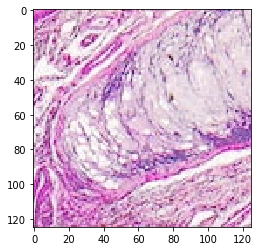

In [4]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1ZnPgFOFw77SMor9Um6gCohxhJUv-gCzP', 1)

plt.imshow(img)

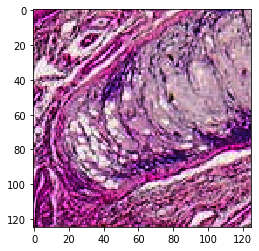

In [5]:
img = img/255.0
img = cv2.pow(img, 3)
img_gamma = np.uint8(img*255)
  
plt.imshow(img_gamma)

#### Exercício #9 
  - Utilizar a função [`equalizeHist`](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) do OpenCV nas imagens anteriores `low_key` e `high_key`
  - Analizar o histograma de cada uma

Para fazer isto, você precisa primeiro transformar as imagens de RGB para o espaço de cor YCbCr utilizando a função [`cvtColor`](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab), pois este espaço de cor serpara os valores de intensidade dos componentes de cor da imagem. Então, é preciso separar os canais de cores utilizando a função [`split`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a) e aplica-se a função [`equalizeHist`](https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e) no primeiro canal (canal[0])

Finalmente, juntamos os canais novamente utilizando a função [`merge`](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d) resultando na imagem final.

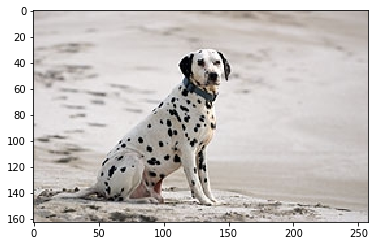

In [6]:
high_key = read_image_from_drive('https://docs.google.com/uc?export=download&id=1cbtqsjVRLrIDbXMlbt9NtfmpMFXSpkdL', 1)
plt.imshow(high_key)

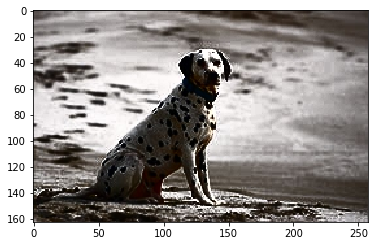

In [7]:
high_key_ycrcb = cv2.cvtColor(high_key, cv2.COLOR_RGB2YCrCb)
channels = cv2.split(high_key_ycrcb)
channels[0] = cv2.equalizeHist(channels[0])
high_key_ycrcb = cv2.merge(channels)
high_key_rgb = cv2.cvtColor(high_key_ycrcb, cv2.COLOR_YCrCb2RGB)
plt.imshow(high_key_rgb)

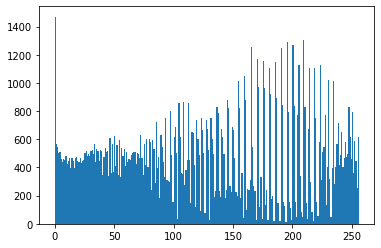

In [8]:
_ = plt.hist(high_key_rgb.ravel() ,256,[0,256])

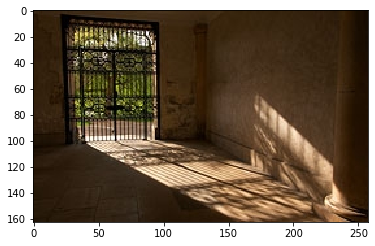

In [9]:
low_key = read_image_from_drive('https://docs.google.com/uc?export=download&id=1cxV9uq2z9G-sUx137mxuafWkc3KyC4ZX', 1)
plt.imshow(low_key)

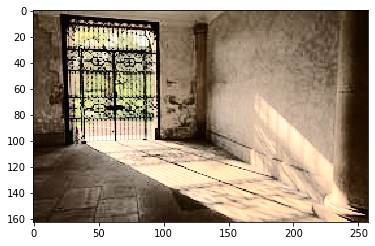

In [10]:
low_key_ycrcb = cv2.cvtColor(low_key, cv2.COLOR_RGB2YCrCb)
channels = cv2.split(low_key_ycrcb)
channels[0] = cv2.equalizeHist(channels[0])
low_key_ycrcb = cv2.merge(channels)
low_key_rgb = cv2.cvtColor(low_key_ycrcb, cv2.COLOR_YCrCb2RGB)
plt.imshow(low_key_rgb)

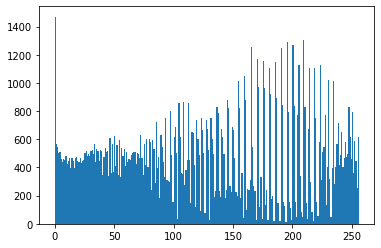

In [11]:
_ = plt.hist(high_key_rgb.ravel() ,256,[0,256])

#### Exercício #10
  - Aplicar um filtro convolucional na mão
    - filtro de desfoque médio (_mean blur_)
 
      <img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1W3UvuD7H1tAgQ4cPPILQ-xE1dlka8RBw">

    - O que fazer com as bordas?
      - Você pode ignorar elas

<img width="300" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=16Xr-giZ0R3wT27FaRrl_40h2ePu9kqYn">

#### Exercício #11
  - Aplicar 3 filtros convulacionais seguintes na imagem da borboleta

   <br>
<img width="400" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1Mmp9x6kY2b6FqdS3gJll7n5vMwpLZzuA"
     <br> 


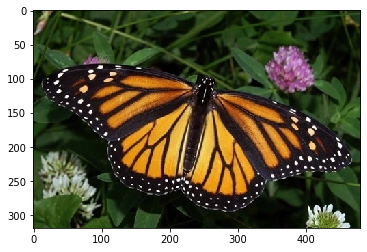

In [13]:
img = read_image_from_drive('https://docs.google.com/uc?export=download&id=1aRETO-NbCFypwfsLj-LZ3Tgta8-oX66n', 1)

plt.imshow(img)

In [0]:
edge_1 = np.array((
	[1, 0, -1],
	[0, 0, 0],
	[-1, 0, 1]), dtype="int")

edge_3 = np.array((
	[-1, -1, -1],
	[-1, 8, -1],
	[-1, -1, -1]), dtype="int")

sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

box_blur = np.array((
	[1, 1, 1],
	[1, 1, 1],
	[1, 1, 1]), dtype="int")/9

gaussian_blur_3x3 = np.array((
	[1, 1, 1],
	[2, 4, 2],
	[1, 2, 1]), dtype="int")/16

gaussian_blur_5x5 = np.array((
	[1, 4, 6, 4, 1],
	[4, 16, 24, 16, 4],
	[6, 24, 36, 24, 6],
  [4, 16, 24, 16, 4],
  [1, 4, 6, 4, 1]), dtype="int")/256

unsharp_masking = np.array((
	[1, 4, 6, 4, 1],
	[4, 16, 24, 16, 4],
	[6, 24, -476, 24, 6],
  [4, 16, 24, 16, 4],
  [1, 4, 6, 4, 1]), dtype="int")*(-1/256)

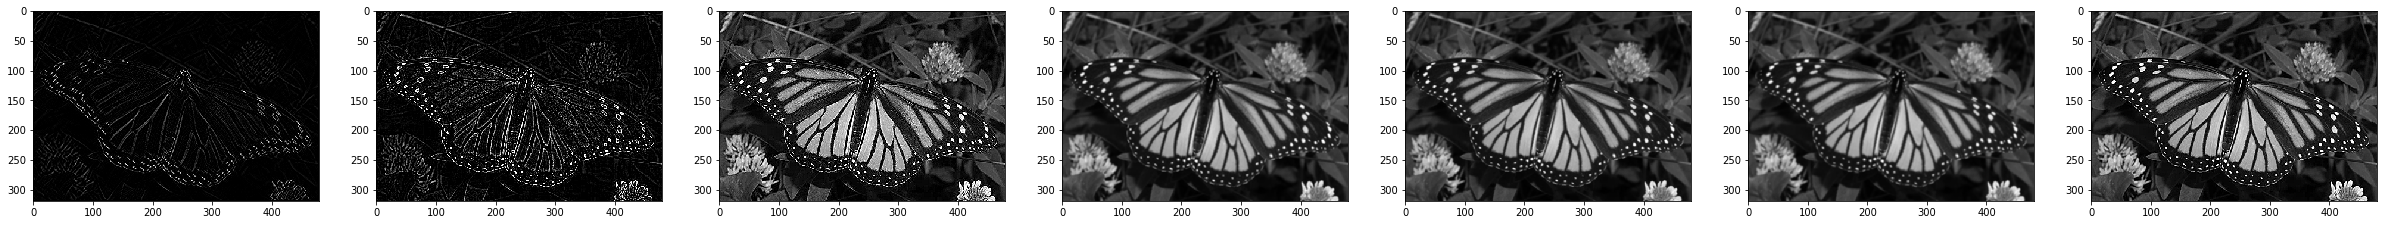

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

filters = []

filters.append(cv2.filter2D(gray,-1,edge_1))
filters.append(cv2.filter2D(gray,-1,edge_3))
filters.append(cv2.filter2D(gray,-1,sharpen))
filters.append(cv2.filter2D(gray,-1,box_blur))
filters.append(cv2.filter2D(gray,-1,gaussian_blur_3x3))
filters.append(cv2.filter2D(gray,-1,gaussian_blur_5x5))
filters.append(cv2.filter2D(gray,-1,unsharp_masking))

plot_images_inline(filters)

#### Exercício #12
  - Aplicar os filtros passa-baixa na seguinte imagem
      <br>
      <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1101KbHddRyR2dJBDrNpa3j8nD0dh7YZu">
    
    - Link para leitura da imagem: https://docs.google.com/uc?export=download&id=1101KbHddRyR2dJBDrNpa3j8nD0dh7YZu
  - Aplicar os filtros passa-alta na seguinte imagem
     <br>
  <img width="200" alt="portfolio_view" src="https://docs.google.com/uc?export=download&id=1_oYq1TohkQRV8tK_sHnmbDFHIXOzYIvM">
    
    - Link para leitura da imagem: https://docs.google.com/uc?export=download&id=1_oYq1TohkQRV8tK_sHnmbDFHIXOzYIvM

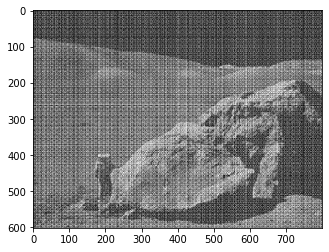

In [16]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1101KbHddRyR2dJBDrNpa3j8nD0dh7YZu", 0)

plt.imshow(img, cmap='gray')

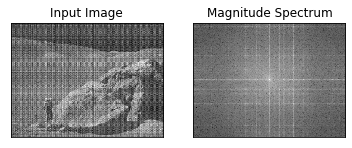

In [17]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

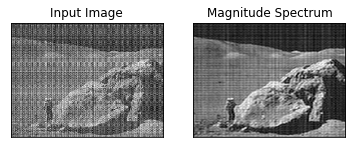

In [18]:
rows, cols = img.shape
crow, ccol = rows/2 , cols/2

opening_gap = 50
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-opening_gap):int(crow+opening_gap), int(ccol-opening_gap):int(ccol+opening_gap)] = 1

fshift = dft_shift*mask

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)

img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

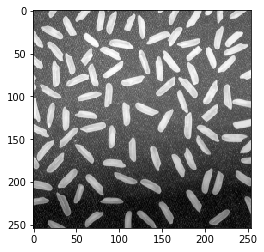

In [29]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1_oYq1TohkQRV8tK_sHnmbDFHIXOzYIvM", 0)

plt.imshow(img, cmap='gray')

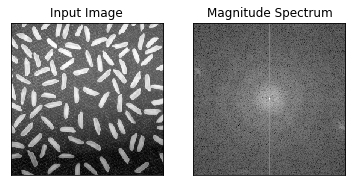

In [30]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

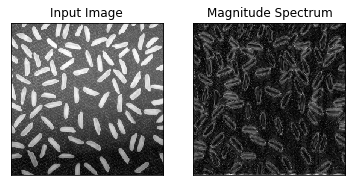

In [31]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

closing_gap = 10
mask = np.ones((rows,cols,2),np.uint8)
mask[int(crow-closing_gap):int(crow+30), int(ccol-30):int(ccol+30)] = 0

fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Exemplos Extras

## Equalização de Histogramas

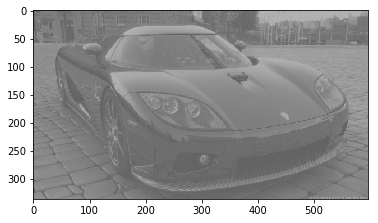

In [0]:
img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1F1mt0yxaximT6kz1Wc8KycXt6fwylMPk", 0)

plt.imshow(img)

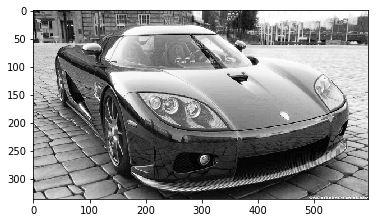

In [0]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_eq = cv2.equalizeHist(img)
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_GRAY2BGR)

plt.imshow(img_eq)

- ## Fundamentos sobre filtragem espacial
  - ### filtros de suavização

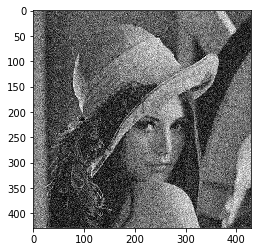

In [0]:
# Vamos aplicar um filtro de suavização em uma imagem com ruídos

img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1K9D6-rShrLGLYzMQ48ljlxtqGa5iEwA0", 0)

plt.imshow(img)

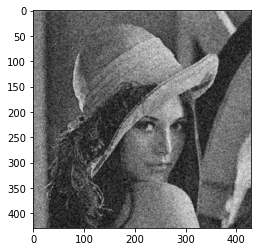

In [0]:
# filtros de média

average_kernel = np.ones((3,3), np.uint8)/9

dst = cv2.filter2D(img,-1,average_kernel)

plt.imshow(dst)

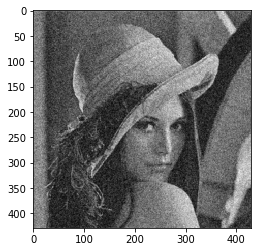

In [0]:
# filtro gaussiano: A suavização média trata o mesmo com todos os pixels da vizinhança. 
# Para reduzir o desfoque no processo de suavização e obter um efeito de suavização mais natural, 
# é natural pensar em aumentar o peso do ponto central do modelo e reduzir o peso de pontos distantes. 
# Para que a nova intensidade do ponto central fique mais próxima dos vizinhos mais próximos.


gaussian_kernel = np.array((
	[1, 2, 1],
	[2, 4, 2],
	[1, 2, 1]), dtype="int")/16

dst = cv2.filter2D(img,-1,gaussian_kernel)

plt.imshow(dst)


- ## Fundamentos sobre filtragem espacial
  - ### filtros de aguçamento

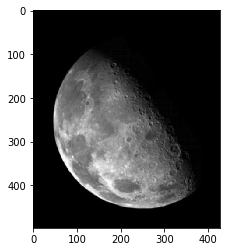

In [0]:
# Os filtros de nitidez da imagem realçam as bordas removendo o desfoque. 
# Ele aprimora a transição em escala de cinza de uma imagem, que é o oposto da suavização da imagem. 
# A diferença é que, ao suavizar, tentamos suavizar o ruído e ignorar as bordas e, ao aguçar, tentamos aprimorar as bordas e ignorar o ruído.

img = read_image_from_drive("https://docs.google.com/uc?export=download&id=1Trqmq4K4sK-3bOfIyeJ5gOmbXuaJif6h", 0)

plt.imshow(img)

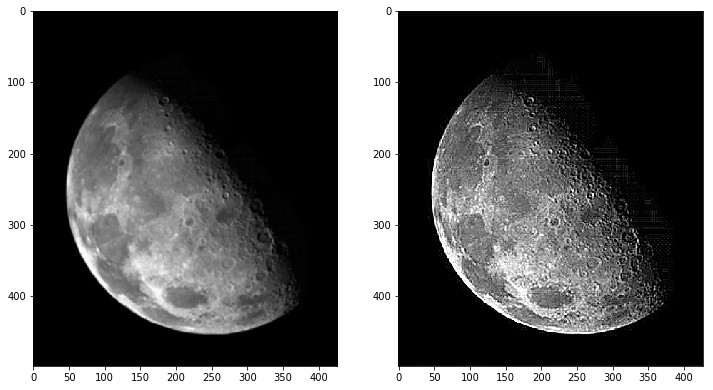

In [0]:
laplace_kernel = np.array((
	[-1,-1,-1],
	[-1,9,-1],
	[-1,-1,-1]), dtype="int")

dst = cv2.filter2D(img,-1,laplace_kernel)

plot_images_inline([img, dst])